In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
# import minmax
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df = pd.read_csv('sinais_vitais_com_label_treino.txt', sep=',', header=0)
X = df.iloc[:, 3:6]
y = df.iloc[:, 6]

# normalize the data between 0 and 1
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

model1 = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=500)
model2 = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate_init=0.01, max_iter=500)
model3 = MLPRegressor(hidden_layer_sizes=(50, 50), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=500)
model4 = MLPRegressor(hidden_layer_sizes = (50, 50), activation = 'tanh', solver = 'adam', max_iter = 500, learning_rate_init = 0.007)  
# model5 = MLPRegressor(hidden_layer_sizes = (50, 50), activation = 'tanh', solver = 'adam', max_iter = 1000, learning_rate_init = 0.002)
model6 = MLPRegressor(hidden_layer_sizes = (100,100,100), activation = 'tanh', solver = 'adam', max_iter = 1000, learning_rate_init = 0.002)  
model5 = MLPRegressor(hidden_layer_sizes = (100, 100), activation = 'tanh', solver = 'adam', max_iter = 800, learning_rate_init = 0.002, batch_size=32, learning_rate='adaptive')
best_model = None
best_rmse = None

models = [model1, model2, model3, model4, model5, model6]
for i, model in enumerate(models, start=1):
    model.fit(X, y)
    predictions = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    print(f'Model {i} RMSE: {rmse}')
    if best_model is None or rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f'Best model RMSE: {best_rmse}')

blind_test_data = pd.read_csv('sinais_vitais_validacao.txt', sep=',', header=0)
X_blind_test = blind_test_data.iloc[:, 3:6]

blind_test_predictions = best_model.predict(X_blind_test)

pd.DataFrame(blind_test_predictions).to_csv('predictions.csv', index=False, header=False)

Model 1 RMSE: 12.042560230112171
Model 2 RMSE: 16.275191821833896
Model 3 RMSE: 16.1361464635001
Model 4 RMSE: 9.106906830718243
Model 5 RMSE: 3.294291480148903
Model 6 RMSE: 6.290205400078363
Best model RMSE: 3.294291480148903


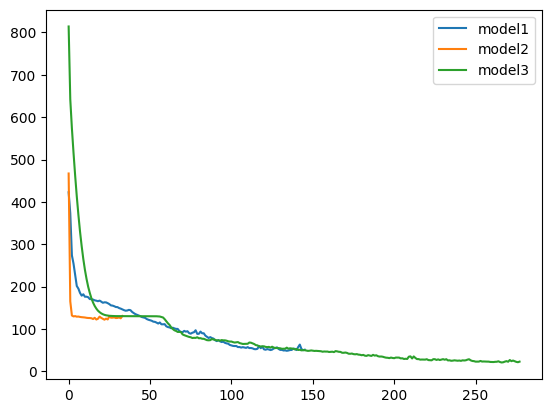

In [64]:
import matplotlib.pyplot as plt

plt.plot(model1.loss_curve_, label='model1')
plt.legend()
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model5, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(np.sqrt(-scores))
print(np.mean(np.sqrt(-scores)))

[-27.21579187 -51.76837669 -19.32432889 -20.21409295 -52.82279083]
[5.21687568 7.19502444 4.3959446  4.49600856 7.26792892]
5.714356439326893


In [4]:
from sklearn.model_selection import cross_val_score

models = [model1, model2, model3, model4, model5]
best_model = None
best_rmse = float('inf')

for i, model in enumerate(models, start=1):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)
    print(f'Model {i} average RMSE: {avg_rmse}')
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_model = model

print(f'Best model average RMSE: {best_rmse}')

Model 1 average RMSE: 11.643642923307278
Model 2 average RMSE: 16.022443908765062
Model 3 average RMSE: 13.171751156455784
Model 4 average RMSE: 8.096019719174024
Model 5 average RMSE: 4.808861075655096
Best model average RMSE: 4.808861075655096


In [79]:
X_real = pd.read_csv('sinais_vitais_validacao.txt', sep=',', header=0)
last_column = X_real.iloc[:, 6]
last_column

0     19.088752
1     45.352511
2     75.441191
3     47.078517
4     25.170488
5     28.001125
6     37.221757
7     56.745930
8     43.766506
9     73.370584
10    50.347280
11    80.222102
12    61.574478
13    85.063702
14    27.122607
15    24.404275
16    40.477454
17    36.254756
18    24.499638
19    13.287645
20    25.019083
21    13.280303
22    25.741373
23    39.909874
24    41.894602
25    81.489030
26    48.951965
27    57.582662
28    77.552926
29    77.195261
30    76.512372
31    68.333333
32    36.753032
33    44.002690
34    56.378662
35    28.115649
36    41.474575
37    68.221244
38    42.831655
39    25.594217
40    27.122607
41    85.190771
Name: gravidade, dtype: float64

In [80]:
blind_test_predictions

array([36.26709844, 43.72110973, 75.52191921, 44.72749354, 22.8760474 ,
       26.84092863, 32.30937144, 58.12525197, 45.8128959 , 67.55665131,
       50.51089179, 83.37122751, 61.9329093 , 85.12351334, 27.13641692,
       26.87522058, 37.89169248, 35.43531827, 22.50268226, 11.6149013 ,
       14.51883304, 10.5273194 , 21.61490612, 32.78143466, 37.4027019 ,
       82.65971148, 46.24432676, 52.51675607, 79.45829212, 79.29239713,
       79.41332042, 64.46569478, 31.71836243, 39.1694159 , 59.57164886,
       24.56344966, 41.32368906, 61.74187935, 51.82439787, 23.1377309 ,
       32.40171143, 84.49852915])

In [81]:
# compare the % difference of predictions and X_real gravidade. So get the accuracy, as example if the prediction is 10 and the real is 9, the accuracy is 90%
accuracy = []
for i in range(len(blind_test_predictions)):
    accuracy.append((blind_test_predictions[i] / last_column[i]) * 100)
print(accuracy)
# mean of the accuracy
print(np.mean(accuracy))

[189.99198292609313, 96.402842465101, 100.10700813118454, 95.00616500746054, 90.88440161822928, 95.85660801532414, 86.80238129891428, 102.43069762161767, 104.67569859208008, 92.07593509822847, 100.32496650018396, 103.92550859089071, 100.58211017994417, 100.07031358931866, 100.05091663110059, 110.12505216824617, 93.61184743297355, 97.73977866889757, 91.84903979191952, 87.41128547378, 58.031035892747575, 79.27017480559851, 83.96951522623027, 82.13865735847298, 89.27809338098231, 101.43661236944692, 94.46878538502015, 91.20237628347662, 102.45685910373837, 102.7166643373016, 103.79147626300318, 94.34004160594162, 86.30134905039353, 89.0159576651904, 105.66346689926482, 87.36575727295865, 99.63619654252015, 90.50242377113643, 120.99555310035433, 90.40218302804158, 119.4638532867545, 99.18742154066456]
97.89426176120779
